# Ford GoBike System Data Exploration
## by Ayanwoye Gideon Ayandele

## Investigation Overview

> In this investigation, I wanted to look at the time of the day and day of the week that most trips are taken, how long does the average trip take and see if the results of the ealier investigations depend on if a user is a subscriber or a customer.

## Dataset Overview

Upon proper data preparation for exploration, the dataset contains 183,412 rows and 11 columns:
-  start_time (datetime).
-  start_station_name (object) 
-  end_station_name (object) 
-  user_type (categorical) - Subscriber and Customer.
-  member_gender (categorical) - Male, Female and Other

Also, new columns were created:
-  day_of_week: to store week day number from start_time.
-  start_hour: to store hour number from start_time.
-  time_of_day: to store the time of the day from start_hour
-  duration_min: to store the duration in minutes.
-  user_age: to store the user's age from member
-  user_age_bin: grouped/binned ages for age group exploration

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('engineered-201902-fordgobike-tripdata.csv')

## most trips taken in terms of day of the week

> The day of the week with the most trips is **Thursday** followed by Tuesday and wednesday.

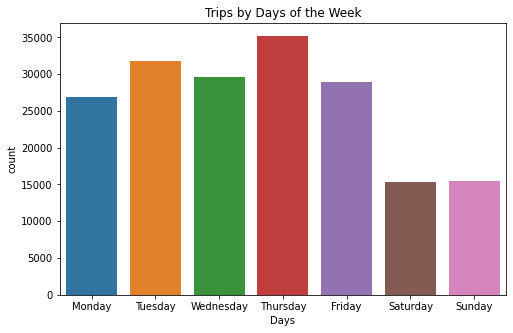

In [9]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# plot distribution of day of week
plt.figure(figsize=[8, 5])
sns.countplot(data = df, x = 'day_of_week', order=weekday)
plt.title('Trips by Days of the Week')
plt.xlabel('Days')
plt.show();

## most trips taken in terms of time of day

> The time of the day with the most trips is Afternoon (12:00 - 17:59 hours of the day) followed by Morning (00:00 - 11:59 hours of the day) with a very little difference from the afternoon.

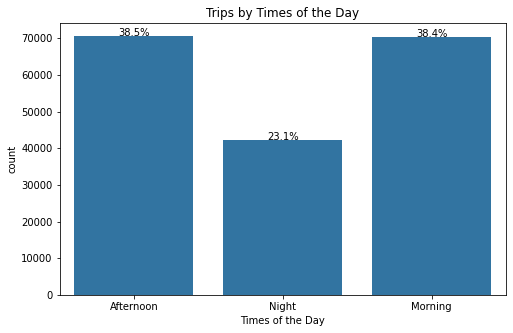

In [10]:
# plot distribution of day of week
plt.figure(figsize=[8, 5])
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'time_of_day', color = base_color)
n_points = df.shape[0]
user_counts = df['time_of_day'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center')

plt.title('Trips by Times of the Day')
plt.xlabel('Times of the Day')
plt.show();

## Distribution of Duration
Most rides took about (9-12) minutes. And very few rides lasted more than one hour (60 minutes). After standardizing by converted from second to minute and then plotted on a logarithmic scale, the distribution of trip duration takes on a unimodal shape.



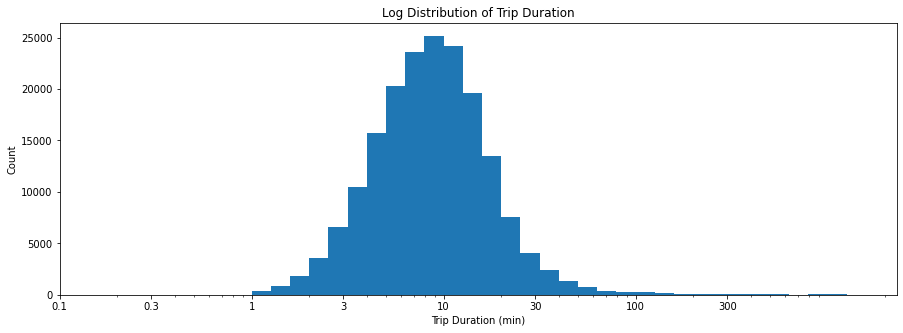

In [12]:
# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[15, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.ylabel('Count')
plt.title('Log Distribution of Trip Duration')
plt.show();

## Does the time of the day that most trips are taken dependent on if a user is a subscriber or a customer?

The time of the day that most trips are taken (Afternoon and Morning) is slightly dependent on if a user is a subscriber or a customer. It was realized that Customers often start the trip in the afternoon where as Subscribers mostly start the trip in the morning.

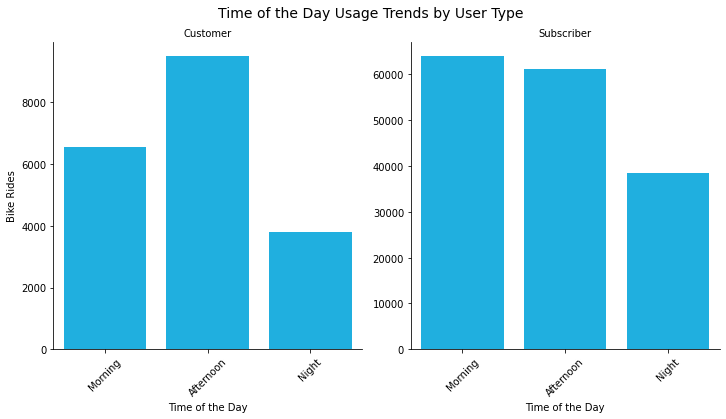

In [13]:
day_time = ['Morning', 'Afternoon', 'Night']
g = sns.catplot(data=df, x='time_of_day', col="user_type", kind='count', sharey = False, color = 'deepskyblue', order = day_time)
g.set_axis_labels("Time of the Day", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Time of the Day Usage Trends by User Type', y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);

## Does the day of the week that most trips are taken dependent on if a user is a subscriber or a customer?

The day of the week that most trips are taken (Thursday) is NOT dependent on if a user is a subscriber or a customer. It was discovered that Customers often use the service during weekends where as Subscribers mostly use the service during regular weekdays from Monday to Friday. 

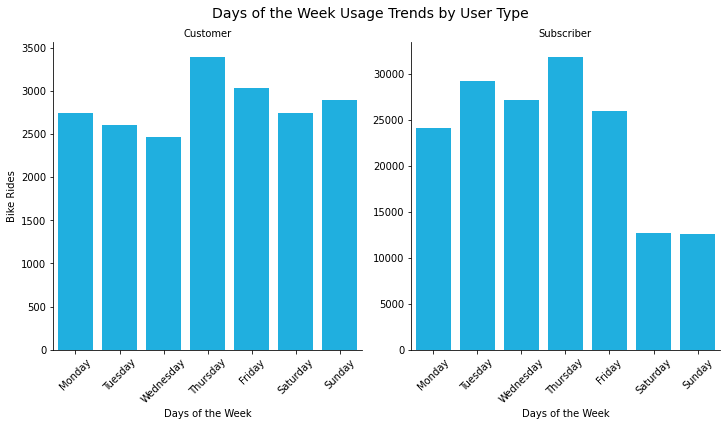

In [17]:
g = sns.catplot(data=df, x='day_of_week', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = weekday)
g.set_axis_labels("Days of the Week", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Days of the Week Usage Trends by User Type', y=1.03, fontsize=14)
g.set_xticklabels(rotation = 45);

## Does the average trip duration taken dependent on if a user is a subscriber or a customer?

The average trip duration IS highly dependent on if a user is a subscriber or just a customer. On average, Customers (24 minutes) have two times trip duration lenght of subscribers (10 minutes) i.e. Subscriber users tend to ride the bikes in lesser duration than customer users

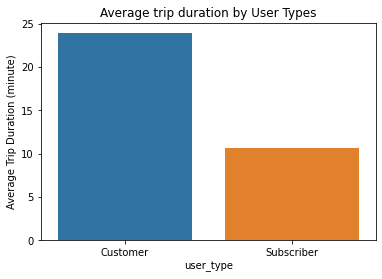

In [14]:
# Average trip duration mean plot
grouped_user_type_duration = df[['user_type','duration_min']].groupby(['user_type'],as_index= False).mean()
sns.barplot(x='user_type', y='duration_min', data=grouped_user_type_duration)
plt.title("Average trip duration by User Types")
plt.ylabel("Average Trip Duration (minute)")
plt.show();

## Daily Trip Duration

Since the Customers user mostly go on trips by weekends (Satrday and Sunday) and also go on the longer trip duration, It is expect that the average trip duration should then be the highest on weekends. 

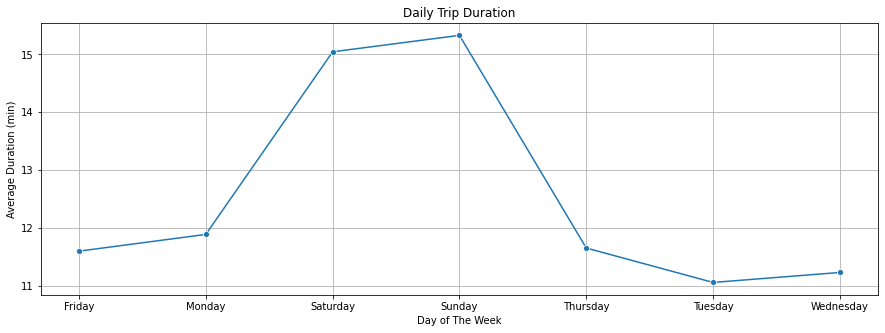

In [15]:
weekday_avg_min = df[['day_of_week','duration_min']].groupby(['day_of_week'],as_index= False).mean()
# plot a line plot
plt.figure(figsize=[15,5])
sns.lineplot(data=weekday_avg_min, x='day_of_week', y='duration_min',marker='o')
plt.ylabel('Average Duration (min)');
plt.xlabel('Day of The Week')
plt.grid()
plt.title('Daily Trip Duration')
plt.show();

## Daily average trip duration for each user_type

On average, customers rides lasted longer than subscribers rides on every day of the week.

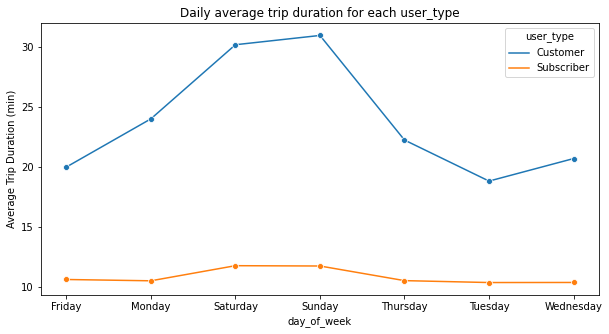

In [16]:
user_weekday_avg_min = df.groupby(['user_type','day_of_week']).duration_min.mean()
user_weekday_avg_min = user_weekday_avg_min.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sns.lineplot(data = user_weekday_avg_min, x='day_of_week', y='duration_min', hue='user_type', marker='o')
plt.title("Daily average trip duration for each user_type")
plt.ylabel('Average Trip Duration (min)');